In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
np.set_printoptions(precision=5,suppress=True)

In [391]:
dataset = pd.read_csv('linear_regression_data.csv',header=None).rename(columns={0:'x',1:'y'})
dataset

,x,y
0,0.392938,0.086360
1,-0.427721,-0.643872
2,-0.546297,-0.674981
3,0.102630,-0.262892
4,0.438938,0.143177
5,-0.153787,-0.472729
6,0.961528,0.114167
7,0.369659,-0.180323
8,-0.038136,0.011821
9,-0.215765,-0.079865


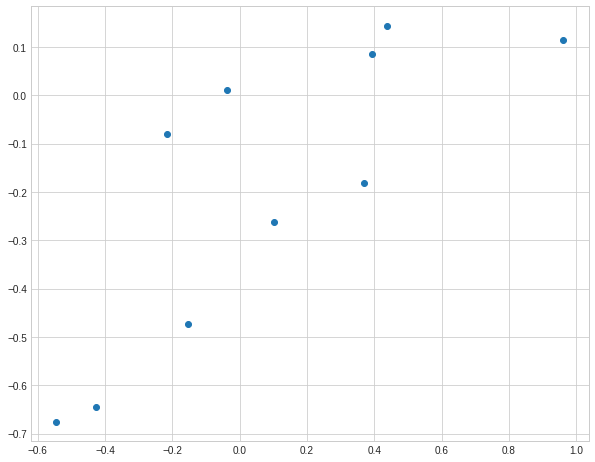

In [392]:
plt.figure(figsize=(10,8))
plt.scatter(dataset['x'],dataset['y'])

In [393]:
X = np.hstack([np.ones(dataset.shape[0]).reshape(-1,1),dataset['x'].values.reshape(-1,1)])
y = dataset['y'].values.reshape(-1,1)

# momentos da priori
m0 = np.zeros(2).reshape(-1,1)
S0 = np.diag((1,1))

# variância do ruído
sigma_ruido = 0.5

In [394]:
u_1 = np.linalg.inv(S0.dot(X.T).dot(X) + np.eye(2)*sigma_ruido) 
u_2 = S0.dot(X.T).dot(y - X.dot(m0))
u = m0 + u_1.dot(u_2)
u

array([[-0.22210404],
       [ 0.4219028 ]])

In [395]:
sigma_1 = u_1
sigma_2 = S0.dot(X.T).dot(X).dot(S0)
sigma = S0 + sigma_1 * sigma_2
sigma

array([[ 1.9819455 , -0.03104278],
       [-0.03104278,  1.82248421]])

In [399]:
# Distribuição preditiva
u_final = X.dot(u)
sigma_final = np.diag(X.dot(sigma).dot(X.T) + sigma_ruido * np.eye(10))


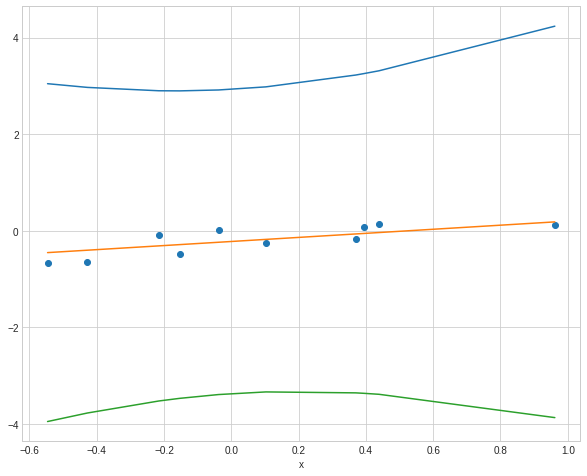

In [397]:
plt.figure(figsize=(10,8))
plt.scatter(dataset['x'],dataset['y'])
banda = 2 * np.sqrt(sigma_final).reshape(-1,1)
u_banda_mais = u_final + banda
u_banda_mais = u_banda_mais.flatten()
u_banda_menos = u_final - banda
u_banda_menos = u_banda_menos.flatten()
u_final_ = u_final.flatten()

sns.lineplot(dataset['x'],u_banda_mais)
sns.lineplot(dataset['x'],u_final_)
sns.lineplot(dataset['x'],u_banda_menos)


In [302]:
def MSE(pred,true):
    return np.sum((pred - true)**2)/10

In [398]:
MSE(u_final,y)

0.033682807054186636

In [307]:
np.sqrt(sigma_final).reshape(-1,1).flatten()

array([1.31510939, 1.33749654, 1.40181682, 1.23239656, 1.33648138,
       1.24244722, 1.69622848, 1.30509046, 1.22798834, 1.25673631])

In [327]:
# momentos da priori
m0 = np.zeros(2).reshape(-1,1)
S0 = np.diag((1,1))
S0_ = []
m0_ = []
for i in np.linspace(0,50,1000):
    # variância do ruído
    #S0 = np.diag((i,i))
    m0 = np.zeros(2).reshape(-1,1) + i
    #print(f"-----sigma_ruido = {i:.3f}-----")

    u_1 = np.linalg.inv(S0.dot(X.T).dot(X) + np.eye(2)*sigma_2) 
    u_2 = S0.dot(X.T).dot(y - X.dot(m0))
    u = m0 + u_1.dot(u_2)

    sigma_1 = u_1
    sigma_2 = S0.dot(X.T).dot(X).dot(S0)
    sigma = S0 + sigma_1 * sigma_2

    u_final = X.dot(u).flatten()
    sigma_final = np.diag(X.dot(sigma).dot(X.T) + sigma_ruido * np.eye(10)).flatten()

#     plt.figure(figsize=(10,8))
#     plt.title(f"-----sigma_ruido = {i:.3f}-----")
#     plt.scatter(dataset['x'],dataset['y'])
    banda = 2 * np.sqrt(sigma_final).reshape(-1,1).flatten()
    u_banda_mais = u_final + banda
    #u_banda_mais = u_banda_mais.flatten()
    u_banda_menos = u_final - banda
    #u_banda_menos = u_banda_menos.flatten()
    #u_final_ = u_final.flatten()
#     S0_.append(MSE(u_final,y))
    m0_.append(MSE(u_final,y))
    print(f"m0 =  {i} ; score = {m0_[-1]}")

#     print(f"S0 =  {i} ; score = {S0_[-1]}")
#     sns.lineplot(dataset['x'],u_banda_mais)
#     sns.lineplot(dataset['x'],u_final_)
#     sns.lineplot(dataset['x'],u_banda_menos)

m0 =  0.0 ; score = 1.084878721013018
m0 =  0.05005005005005005 ; score = 1.1662552547354523
m0 =  0.1001001001001001 ; score = 1.2624958816523315
m0 =  0.15015015015015015 ; score = 1.3736006017636553
m0 =  0.2002002002002002 ; score = 1.4995694150694243
m0 =  0.2502502502502503 ; score = 1.6404023215696377
m0 =  0.3003003003003003 ; score = 1.7960993212642973
m0 =  0.3503503503503504 ; score = 1.9666604141534005
m0 =  0.4004004004004004 ; score = 2.1520856002369495
m0 =  0.45045045045045046 ; score = 2.352374879514943
m0 =  0.5005005005005005 ; score = 2.567528251987381
m0 =  0.5505505505505506 ; score = 2.797545717654265
m0 =  0.6006006006006006 ; score = 3.042427276515592
m0 =  0.6506506506506506 ; score = 3.302172928571366
m0 =  0.7007007007007008 ; score = 3.576782673821583
m0 =  0.7507507507507508 ; score = 3.866256512266247
m0 =  0.8008008008008008 ; score = 4.170594443905356
m0 =  0.8508508508508509 ; score = 4.489796468738907
m0 =  0.9009009009009009 ; score = 4.8238625867669

m0 =  28.37837837837838 ; score = 2432.3326314154583
m0 =  28.42842842842843 ; score = 2440.841948790431
m0 =  28.47847847847848 ; score = 2449.3661302585983
m0 =  28.52852852852853 ; score = 2457.905175819961
m0 =  28.57857857857858 ; score = 2466.459085474517
m0 =  28.62862862862863 ; score = 2475.0278592222676
m0 =  28.67867867867868 ; score = 2483.6114970632125
m0 =  28.72872872872873 ; score = 2492.2099989973512
m0 =  28.77877877877878 ; score = 2500.8233650246852
m0 =  28.82882882882883 ; score = 2509.451595145214
m0 =  28.87887887887888 ; score = 2518.094689358936
m0 =  28.92892892892893 ; score = 2526.7526476658536
m0 =  28.97897897897898 ; score = 2535.425470065965
m0 =  29.02902902902903 ; score = 2544.113156559271
m0 =  29.07907907907908 ; score = 2552.8157071457717
m0 =  29.12912912912913 ; score = 2561.5331218254664
m0 =  29.17917917917918 ; score = 2570.2654005983563
m0 =  29.22922922922923 ; score = 2579.0125434644387
m0 =  29.27927927927928 ; score = 2587.7745504237196


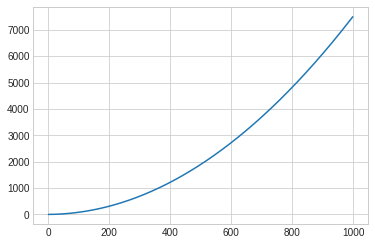

In [328]:
plt.plot(m0_)

In [276]:
dataset = pd.read_csv('polynomial_regression_data.csv',header=None).rename(columns={0:'x',1:'y'})
dataset

,x,y
0,0.696469,-0.851271
1,0.286139,0.910864
2,0.226851,0.939731
3,0.551315,-0.323798
4,0.719469,-0.872451
5,0.423106,0.417776
6,0.980764,-0.153078
7,0.684830,-0.949134
8,0.480932,0.281049
9,0.392118,0.787241


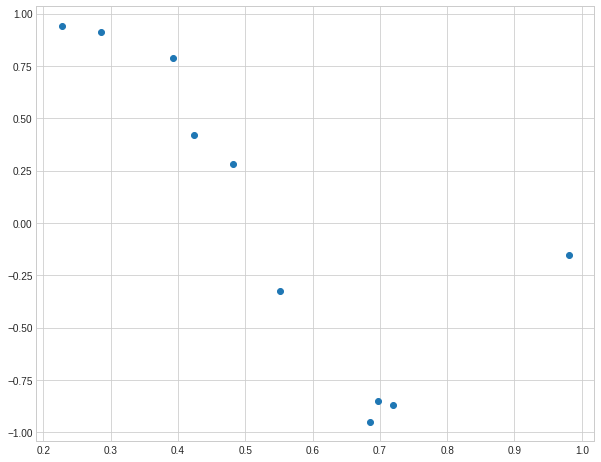

In [277]:
plt.figure(figsize=(10,8))
plt.scatter(dataset['x'],dataset['y'])

In [278]:
x = dataset['x'].values.reshape(-1,1)
y = dataset['y'].values.reshape(-1,1)

In [279]:
p = 6

In [280]:
x

array([[0.69647],
       [0.28614],
       [0.22685],
       [0.55131],
       [0.71947],
       [0.42311],
       [0.98076],
       [0.68483],
       [0.48093],
       [0.39212]])

In [281]:
X = np.ones(dataset.shape[0]).reshape(-1,1)
for i in range (1,p):
    arr = x ** i
    X = np.hstack([X,arr.reshape(-1,1)])
    
X

array([[1.     , 0.69647, 0.48507, 0.33784, 0.23529, 0.16387],
       [1.     , 0.28614, 0.08188, 0.02343, 0.0067 , 0.00192],
       [1.     , 0.22685, 0.05146, 0.01167, 0.00265, 0.0006 ],
       [1.     , 0.55131, 0.30395, 0.16757, 0.09238, 0.05093],
       [1.     , 0.71947, 0.51764, 0.37242, 0.26795, 0.19278],
       [1.     , 0.42311, 0.17902, 0.07574, 0.03205, 0.01356],
       [1.     , 0.98076, 0.9619 , 0.9434 , 0.92525, 0.90745],
       [1.     , 0.68483, 0.46899, 0.32118, 0.21995, 0.15063],
       [1.     , 0.48093, 0.2313 , 0.11124, 0.0535 , 0.02573],
       [1.     , 0.39212, 0.15376, 0.06029, 0.02364, 0.00927]])

In [282]:
X.shape

(10, 6)

In [291]:
1/25

0.04

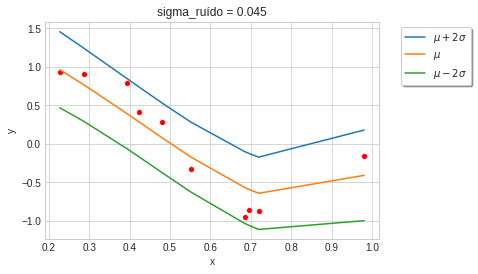

In [293]:
m0 = np.zeros(p).reshape(-1,1)
S0 = np.eye((p)) 

# variância do ruído
sigma_ruido = 0.045

#u_1 = np.linalg.inv(S0.dot(X.T).dot(X)) 
u_1 = np.linalg.inv(S0.dot(X.T).dot(X) + np.eye(p)*sigma_ruido) 
u_2 = S0.dot(X.T).dot(y - X.dot(m0))
u = m0 + u_1.dot(u_2)
# print('u = \n',u)

#sigma_1 = np.linalg.inv(S0.dot(X.T).dot(X))
sigma_1 = u_1 
sigma_2 = S0.dot(X.T).dot(X).dot(S0)
sigma = S0 - (sigma_1.dot(sigma_2))
# print('\nsigma = \n',sigma)

u_final = X.dot(u).flatten()
#sigma_final = np.diag(X.dot(sigma).dot(X.T))
sigma_final = np.diag(X.dot(sigma).dot(X.T) + np.eye(10)*sigma_ruido )
# print('\nu_final = \n',u_final)
# print('\nsigma_final = \n',sigma_final)

banda = 2 * np.sqrt(sigma_final).reshape(-1,1).flatten()
banda_mais = u_final + banda
banda_menos = u_final - banda

plt.title(f"sigma_ruído = {sigma_ruido}")
sns.scatterplot(dataset['x'],dataset['y'],color='r')
sns.lineplot(dataset['x'],banda_mais,label='$\mu+2 \sigma$')
sns.lineplot(dataset['x'],u_final,label='$\mu$')
sns.lineplot(dataset['x'],banda_menos,label='$\mu-2 \sigma$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,shadow=True,frameon=True)
plt.show()


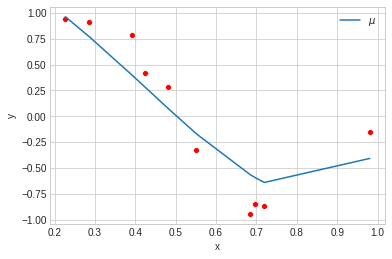

In [286]:
sns.scatterplot(dataset['x'],dataset['y'],color='r')
sns.lineplot(dataset['x'],u_final,label='$\mu$')